<a href="https://colab.research.google.com/github/Indian-otaku/Keras_Programs/blob/main/Word_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [215]:
from google.colab import drive
import os
import shutil
import json

d_or_c_option = "d"
d_or_c_name = "arnavsharmaas/chatbot-dataset-topical-chat" #"grafstor/simple-dialogs-for-chatbot"

os.system("pip install kaggle")

kaggle_key_path = "/content/drive/MyDrive/Kaggle API Key/kaggle.json"
kaggle_key_dest = "/.kaggle"
dataset_path = "/content/data/"

if os.path.exists(dataset_path) is False:
  if d_or_c_option:
    d_or_c = d_or_c_option
  else:
    d_or_c = str.lower(input("Enter D for dataset or C for competition: "))
  if (d_or_c == 'd'):
    if d_or_c_name:
      d_name = d_or_c_name
    else:
      d_name = input("Enter the name of dataset in 'owner/dataset' format: ")
  elif (d_or_c == 'c'):
    if d_or_c_name:
      c_name = d_or_c_name
    else:
      c_name = input("Enter the name of competition in 'owner/competition' format: ")
  else:
    print("Enter valid option!")

if os.path.exists("/content/drive") is False:
  drive.mount('/content/drive')
  print("Drive is ready to use!")
else:
  print("Drive is already ready to use!")

if os.path.exists(os.path.join(kaggle_key_dest, "kaggle.json")) is False:
  os.mkdir(kaggle_key_dest)
  shutil.copy(kaggle_key_path, kaggle_key_dest)
  os.chmod(os.path.join(kaggle_key_dest, "kaggle.json"), 600)
  print("Kaggle api key is ready to use!")
else:
  print("Kaggle api key is already ready to use!")

if os.path.exists(dataset_path) is False:
  with open(os.path.join(kaggle_key_dest, "kaggle.json"), "r") as f:
    data = json.load(f)
  os.environ["KAGGLE_USERNAME"] = data["username"]
  os.environ["KAGGLE_KEY"] = data["key"]
  del data

  import kaggle

  kaggle.api.authenticate()
  if (d_or_c == 'd'):
    kaggle.api.dataset_download_files(
      d_name,
      path=dataset_path,
      unzip=True
    )
  elif (d_or_c == 'c'):
    kaggle.api.competition_download_files(
        c_name,
        path=dataset_path
    )
  print("Data was downloaded!")
else:
  print("Data is already available!")


Drive is already ready to use!
Kaggle api key is already ready to use!
Data is already available!


In [216]:
kaggle.api.dataset_download_files(
    "grafstor/simple-dialogs-for-chatbot",
    path=dataset_path,
    unzip=True
)

2023-12-22 11:47:28,280 WARNING Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'RemoteDisconnected('Remote end closed connection without response')': /api/v1/datasets/download/grafstor/simple-dialogs-for-chatbot?datasetVersionNumber=None


In [217]:
import numpy as np
import pandas as pd

import nltk
nltk.download('punkt')

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [218]:
data1 = pd.read_csv("/content/data/topical_chat.csv")
data1.head()

,conversation_id,message,sentiment
0,1,Are you a fan of Google or Microsoft?,Curious to dive deeper
1,1,Both are excellent technology they are helpfu...,Curious to dive deeper
2,1,"I'm not a huge fan of Google, but I use it a...",Curious to dive deeper
3,1,Google provides online related services and p...,Curious to dive deeper
4,1,"Yeah, their services are good. I'm just not a...",Curious to dive deeper


In [219]:
dataset = data1["message"].values
np.random.seed(60)
np.random.shuffle(dataset)

In [220]:
len(dataset)

188378

In [221]:
dataset[:5]

array([' I did when I was a kid.  I played more outside than kids to today.  More TV and video game entertainment now.  ',
       ' Yes I totally agree with you. And of quarterbacks whom you choose? I for instance definitely Tom Brady',
       ' It was Nixon, had to be, Michael Jordan didnt endorese a black democratic candidate because that could affect the sales of his shoes',
       " Pixar studio has a secret room that we can sadly never visit since we aren't celebrities!",
       " Ha, that's funny. I suppose it is cheeper than buying a car."],
      dtype=object)

In [222]:
dataset = dataset[:10000]

In [223]:
data1 = "\n".join(dataset)
data1[:500]

" I did when I was a kid.  I played more outside than kids to today.  More TV and video game entertainment now.  \n Yes I totally agree with you. And of quarterbacks whom you choose? I for instance definitely Tom Brady\n It was Nixon, had to be, Michael Jordan didnt endorese a black democratic candidate because that could affect the sales of his shoes\n Pixar studio has a secret room that we can sadly never visit since we aren't celebrities!\n Ha, that's funny. I suppose it is cheeper than buying a c"

In [224]:
len(data1)

1046376

In [225]:
text_lens = [len(text) for text in dataset]

In [226]:
len(text_lens)

10000

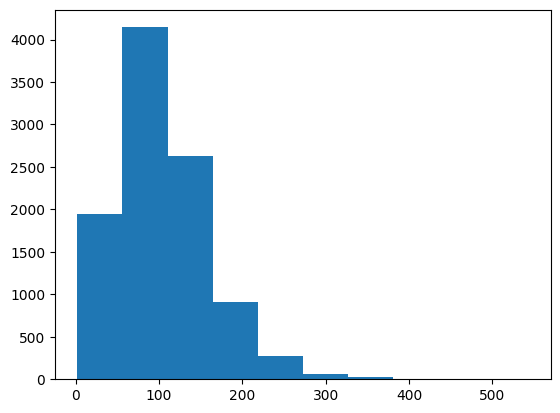

543
2


In [227]:
import matplotlib.pyplot as plt
plt.hist(text_lens)
plt.show()
print(max(text_lens))
print(min(text_lens))

In [228]:
with open("/content/data/dialogs.txt") as f:
    data2 = f.read()

data2[:500]

"hi, how are you doing?\ti'm fine. how about yourself?\ni'm fine. how about yourself?\ti'm pretty good. thanks for asking.\ni'm pretty good. thanks for asking.\tno problem. so how have you been?\nno problem. so how have you been?\ti've been great. what about you?\ni've been great. what about you?\ti've been good. i'm in school right now.\ni've been good. i'm in school right now.\twhat school do you go to?\nwhat school do you go to?\ti go to pcc.\ni go to pcc.\tdo you like it there?\ndo you like it there?\tit's ok"

In [229]:
data2[-500:]

" it's old age, why don't both of your hands hurt?\tthat's a good question. maybe it's not old age.\nthat's a good question. maybe it's not old age.\tare you right-handed?\nare you right-handed?\tyes. all my life.\nyes. all my life.\tyou're wearing out your right hand. stop using it so much.\nyou're wearing out your right hand. stop using it so much.\tbut i do all my writing with my right hand.\nbut i do all my writing with my right hand.\tstart typing instead. that way your left hand will do half the work."

In [230]:
data = data1 + data2
data[:50]

' I did when I was a kid.  I played more outside th'

In [231]:
data[-50:]

'ad. that way your left hand will do half the work.'

In [232]:
pattern = r'\b\w+\b|\.|,|\?|\n|#|[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F700-\U0001F77F\U0001F780-\U0001F7FF\U0001F800-\U0001F8FF\U0001F900-\U0001F9FF\U0001FA00-\U0001FA6F\U0001FA70-\U0001FAFF\U00002600-\U000027BF\U0001F004]'

reg_tokenizer = nltk.tokenize.RegexpTokenizer(pattern)
unique_tokens, count = np.unique(reg_tokenizer.tokenize(str.lower(data)), return_counts=True)

In [233]:
len(unique_tokens)

11091

In [234]:
unique_tokens[count.argsort()[:26][::-1]]

array(['lester', 'leppard', 'learns', 'leonardo', 'leary', 'lease',
       'leftover', 'leg', 'legalities', 'legendary', 'legends', 'legett',
       'legged', 'leggett', 'legitimately', 'legoland', 'legos',
       'leisure', 'leisurely', 'lemons', 'lends', 'lengths', 'lenient',
       'lense', 'lenses', 'kamp'], dtype='<U34')

In [235]:
indices = count.argsort()[26:][::-1]

In [236]:
unique_tokens[indices][:50]

array(['.', '\n', 'i', 'the', ',', 'a', 'that', 'to', 'you', '?', 'it',
       'of', 'is', 'in', 'and', 's', 'have', 'they', 'do', 'was', 't',
       'for', 'like', 'know', 'he', 'are', 'did', 'but', 'not', 'be',
       'what', 'on', 'so', 'about', 'think', 'would', 'with', 'there',
       'how', 'yes', 'can', 'good', 'yeah', 'too', 'as', 'my', 'one',
       'no', 'if', 'really'], dtype='<U34')

In [237]:
from collections import defaultdict

def unknown_token():
    return "[UNK]"

indice_to_token = defaultdict(unknown_token)
indice_to_token[0] = "[UNK]"

for i, indice in enumerate(indices, start=0):
    token = unique_tokens[indice]
    indice_to_token[i] = str.lower(token)

def unknown_index():
    return 0

token_to_indice = defaultdict(unknown_index)

for indice, token in indice_to_token.items():
    token_to_indice[tuple(token)] = indice


In [238]:
len(indice_to_token)

11065

In [239]:
len(token_to_indice)

11065

In [240]:
token_to_indice[tuple("cheief")]

0

In [241]:
eg = reg_tokenizer.tokenize(str.lower(data[:500]))
for token in eg:
    indice = token_to_indice[tuple(token)]
    print(indice_to_token[indice], end=" ")

i did when i was a kid . i played more outside than kids to today . more tv and video game entertainment now . 
 yes i totally agree with you . and of quarterbacks whom you choose ? i for instance definitely tom brady 
 it was nixon , had to be , michael jordan didnt endorese a black democratic candidate because that could affect the sales of his shoes 
 pixar studio has a secret room that we can sadly never visit since we aren t celebrities 
 ha , that s funny . i suppose it is cheeper than buying a c 

In [242]:
dataset = []
for sent in data.split("\n"):
    sent = sent + "\n"
    sent = reg_tokenizer.tokenize(str.lower(sent))
    sent_data = []
    for token in sent:
        indice = token_to_indice[tuple(token)]
        sent_data.append(indice)
    dataset.append(sent_data)

In [243]:
np.array(dataset[:5])

<ipython-input-243-a57b18587a6e>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array(dataset[:5])


array([list([2, 26, 66, 2, 19, 5, 572, 0, 2, 248, 69, 685, 106, 253, 7, 202, 0, 69, 185, 14, 352, 128, 489, 104, 0, 1]),
       list([39, 2, 674, 157, 36, 8, 0, 14, 11, 2777, 8925, 8, 2021, 9, 2, 21, 1499, 246, 631, 663, 1]),
       list([10, 19, 1289, 4, 71, 7, 29, 4, 599, 645, 454, 9937, 5, 368, 2390, 1000, 92, 6, 125, 3366, 3, 3609, 11, 60, 335, 1]),
       list([1422, 958, 59, 5, 1471, 537, 6, 51, 40, 1797, 105, 633, 193, 51, 778, 20, 859, 1]),
       list([364, 4, 6, 15, 161, 0, 2, 1010, 10, 12, 7227, 106, 1148, 5, 206, 0, 1])],
      dtype=object)

In [244]:
n_words = 5

X = []
y = []

for sent in dataset:
    for i in range(n_words, len(sent)):
        X.append(sent[i-n_words:i])
        y.append([sent[i]])

In [245]:
len(X)

228449

In [246]:
X[:5]

[[2, 26, 66, 2, 19],
 [26, 66, 2, 19, 5],
 [66, 2, 19, 5, 572],
 [2, 19, 5, 572, 0],
 [19, 5, 572, 0, 2]]

In [247]:
y[:5]

[[5], [572], [0], [2], [248]]

In [248]:
np.array(y).reshape(-1).max()

11064

In [249]:
del dataset
del data

In [250]:
len(X)*0.8

182759.2

In [251]:
train_X = X[:int(len(X)*0.8)]
train_y = y[:int(len(X)*0.8)]

valid_X = X[int(len(X)*0.8):]
valid_y = y[int(len(X)*0.8):]

In [268]:
train = tf.data.Dataset.from_tensor_slices((np.asarray(train_X, dtype=np.float32), np.asarray(train_y, dtype=np.float32)))
train = train.shuffle(4096).batch(2048).cache().prefetch(tf.data.AUTOTUNE)

valid = tf.data.Dataset.from_tensor_slices((np.asarray(valid_X, dtype=np.float32), np.asarray(valid_y, dtype=np.float32)))
valid = valid.batch(2048).prefetch(tf.data.AUTOTUNE)

In [277]:
model = Sequential([
    layers.Embedding(len(indice_to_token), 32, input_length=n_words),
    layers.Bidirectional(layers.LSTM(32, return_sequences=True)),
    layers.BatchNormalization(),
    layers.Dropout(0.4),
    layers.Bidirectional(layers.LSTM(32, return_sequences=True)),
    layers.BatchNormalization(),
    layers.Dropout(0.4),
    layers.Bidirectional(layers.LSTM(32, return_sequences=False)),
    layers.BatchNormalization(),
    layers.Dropout(0.4),
    layers.Dense(len(indice_to_token), activation="softmax")
])

In [278]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 5, 32)             354080    
                                                                 
 bidirectional_35 (Bidirect  (None, 5, 64)             16640     
 ional)                                                          
                                                                 
 batch_normalization_46 (Ba  (None, 5, 64)             256       
 tchNormalization)                                               
                                                                 
 dropout_46 (Dropout)        (None, 5, 64)             0         
                                                                 
 bidirectional_36 (Bidirect  (None, 5, 64)             24832     
 ional)                                                          
                                                     

In [279]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy"
)

In [280]:
try:
    history = model.fit(
        train,
        epochs=200,
        verbose=1,
        validation_data=valid,
        callbacks=[
            tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=30, restore_best_weights=True, verbose=1),
            tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=10, verbose=1)
        ]
    ).history
except Exception as e:
    print(e)
    print("Error!")
finally:
    from google.colab import output
    import time

    model.save("saved_model.keras")

    output.eval_js('new Audio("https://upload.wikimedia.org/wikipedia/commons/0/05/Beep-09.ogg").play()')
    time.sleep(3)
    output.eval_js('new Audio("https://upload.wikimedia.org/wikipedia/commons/0/05/Beep-09.ogg").play()')
    time.sleep(5)
    output.eval_js('new Audio("https://upload.wikimedia.org/wikipedia/commons/0/05/Beep-09.ogg").play()')

Epoch 1/200
90/90 [==============================] - 22s 124ms/step - loss: 8.7796 - val_loss: 8.8396 - lr: 0.0010
Epoch 2/200
90/90 [==============================] - 2s 23ms/step - loss: 6.9926 - val_loss: 7.3055 - lr: 0.0010
Epoch 3/200
90/90 [==============================] - 2s 23ms/step - loss: 5.9567 - val_loss: 6.2524 - lr: 0.0010
Epoch 4/200
90/90 [==============================] - 2s 23ms/step - loss: 5.5621 - val_loss: 5.6300 - lr: 0.0010
Epoch 5/200
90/90 [==============================] - 2s 23ms/step - loss: 5.3807 - val_loss: 5.2569 - lr: 0.0010
Epoch 6/200
90/90 [==============================] - 2s 27ms/step - loss: 5.2622 - val_loss: 5.1116 - lr: 0.0010
Epoch 7/200
90/90 [==============================] - 2s 27ms/step - loss: 5.1784 - val_loss: 5.0805 - lr: 0.0010
Epoch 8/200
90/90 [==============================] - 2s 24ms/step - loss: 5.1044 - val_loss: 5.0936 - lr: 0.0010
Epoch 9/200
90/90 [==============================] - 2s 23ms/step - loss: 5.0432 - val_loss: 5

In [281]:
model.save("saved_model.keras")

In [282]:
X[0]

[2, 26, 66, 2, 19]

In [283]:
y[0]

[5]

In [284]:
model.predict([[25, 9, 6, 159, 11]]).argsort()[0][-2:]

1/1 [==============================] - 3s 3s/step


array([5, 3])

In [292]:
def sentence_to_token_indices(sentence, n_words=10):
    sentence = str.lower(sentence)
    sent_token_list = reg_tokenizer.tokenize(sentence)[-n_words:]
    sent_index_list = []
    for token in sent_token_list:
        indice = token_to_indice[tuple(token)]
        sent_index_list.append(indice)
    return sent_index_list


def get_full_sentence(sentence, iterations=10):
    sentence = str.lower(sentence)

    for _ in range(iterations):
        sent_index = sentence_to_token_indices(sentence)
        word = indice_to_token[
            np.random.choice(
                model.predict(
                    [sent_index],
                    verbose=0
                )
                .argsort()[0][-2:]
            )
        ]
        sentence = sentence + " " + word

    return sentence

sentence = "Hello world is known for"
print(get_full_sentence(sentence, 20))

hello world is known for a lot . i guess i wonder if it s that it was the same time , it s not
